In [137]:
# importando libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

1) Matriz de correlação: gere uma matriz de correlação entre as variáveis do conjunto de dados e comente os principais relacionamentos identificados, destacando variáveis que apresentem forte correlação com a variável de interesse.

2) Gráficos de dispersão: elabore gráficos de dispersão entre cada variável independente e a variável dependente (aumento de vendas). A partir deles, identifique e comente possíveis padrões, tendências ou outliers relevantes.

3) Análise explicativa para o time de marketing: escreva uma explicação textual clara e didática voltada a profissionais de marketing e outras áreas não técnicas. A análise deve destacar os principais resultados do modelo, incluindo uma conclusão sobre quais canais ou tipos de mídia apresentam o melhor ROI (Return On Investment) para orientar decisões estratégicas.            

In [138]:
# lendo base de dados
path = r'Asset_PBL_Cap 01_2o_Ano_Fase_5/3o_Desafio/Gastos_Publicidade_MelhoresCompras.csv'
df = pd.read_csv(path,encoding='latin1',sep=',', decimal='.')
display(df.head(5))

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
0,2022,1,Paginas web,87000,1000
1,2022,1,Redes sociais,120000,800
2,2022,1,TV,250000,1500
3,2022,1,Jornal,110000,730
4,2022,1,Revista,40000,360


In [139]:
# explorando estrutura do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Ano                                                      200 non-null    int64 
 1   Mes                                                      200 non-null    int64 
 2   Tipo de Midia                                            200 non-null    object
 3   Gastos com Publicidade (em R$)                           200 non-null    object
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [140]:
#identificando registros unicos em tipo de midia
df['Tipo de Midia'].unique()

array(['Paginas web', 'Redes sociais', 'TV', 'Jornal', 'Revista', 'Radio',
       'Instagram', 'Google'], dtype=object)

In [141]:
df[df['Gastos com Publicidade (em R$)'].str.contains(',')]

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
146,2024,1,Paginas web,"99388,8",1190
189,2024,6,Jornal,"142105,6",1044
191,2024,6,Radio,"103286,4",824


In [142]:
# ajustando e convertendo a coluna Gastos com Publicidade (em R$) para dado numerico

df['Gastos com Publicidade (em R$)'] = df['Gastos com Publicidade (em R$)'].str.strip().str.replace(',', '.', regex=False).astype(float)

In [144]:
df.iloc[[146,189,191]]

,Ano,Mes,Tipo de Midia,Gastos com Publicidade (em R$),Previsao Inicial de Aumento de Vendas (em mil unidades)
146,2024,1,Paginas web,99388.8,1190
189,2024,6,Jornal,142105.6,1044
191,2024,6,Radio,103286.4,824


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Ano                                                      200 non-null    int64  
 1   Mes                                                      200 non-null    int64  
 2   Tipo de Midia                                            200 non-null    object 
 3   Gastos com Publicidade (em R$)                           200 non-null    float64
 4   Previsao Inicial de Aumento de Vendas (em mil unidades)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


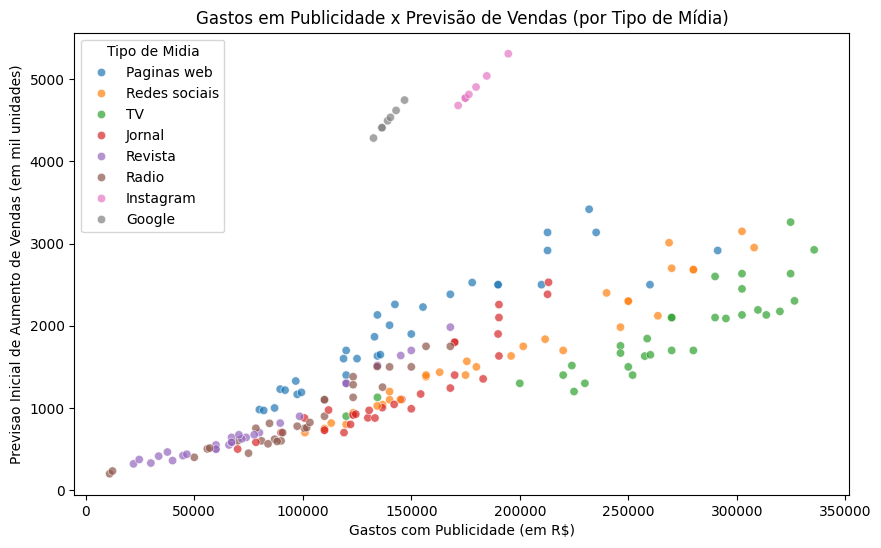

In [146]:
# Relação entre Gastos e Previsão de Vendas por tipo de mídia
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Gastos com Publicidade (em R$)", 
                y="Previsao Inicial de Aumento de Vendas (em mil unidades)", 
                hue="Tipo de Midia", alpha=0.7)
plt.title("Gastos em Publicidade x Previsão de Vendas (por Tipo de Mídia)")
plt.show()

In [ ]:
# df.drop(columns=['Previsao Inicial de Aumento de Vendas (em mil unidades)'], inplace=True)

In [105]:
numeric_cols = ['Gastos com Publicidade (em R$)']

In [ ]:
# identificando outliers por IQR
q = df[numeric_cols].quantile([0.25, 0.75])
Q1 = q.loc[0.25]
Q3 = q.loc[0.75]
IQR = Q3 - Q1

k = 1.5
limite_inferior= Q1 - k * IQR
limite_superior = Q3 + k * IQR

In [88]:
# filtrando outliers
outlier_bool = (df[numeric_cols] < limite_inferior) | (df[numeric_cols] > limite_superior)
df_outliers = df[outlier_bool.any(axis=1)].copy()

In [107]:
# sumarizando outliers
df_IQR = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'Limite_inferior': limite_inferior,
    'Limite_superior': limite_superior,
    'OutlierCount': outlier_bool.sum(),
    'OutlierPct': (outlier_bool.sum() / df[numeric_cols].notna().sum() * 100).round(2)}).sort_values('OutlierPct', ascending=False)
display(df_IQR)

,Q1,Q3,IQR,Limite_inferior,Limite_superior,OutlierCount,OutlierPct
Gastos com Publicidade (em R$),136.0,310.0,174.0,-125.0,571.0,36,18.0


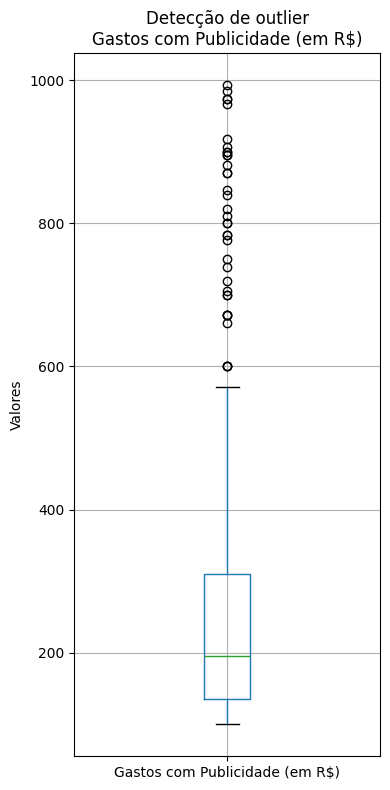

In [108]:
# plot dos outliers
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(4*len(numeric_cols), 8))

if len(numeric_cols) == 1:
    axes = [axes]

for ax, c in zip(axes, numeric_cols):
    df.boxplot(column=c, ax=ax)
    ax.set_title(f'Detecção de outlier\n{c}')
    ax.set_ylabel('Valores')
    ax.set_xticklabels([c], rotation=0)

plt.tight_layout()
plt.show()

In [109]:
# Tratando outliers 
df[numeric_cols] = df[numeric_cols].clip(lower=limite_inferior, upper=limite_superior, axis=1)
df.shape[0]

200

In [110]:
# gerando colunas dummy para a coluna categorica Tipo de Midia e convertendo para int para trocar output booleano por inteiro
df_dummies = pd.get_dummies(df, columns=['Tipo de Midia'], drop_first=False).astype(int)
df_dummies

,Ano,Mes,Gastos com Publicidade (em R$),Tipo de Midia_Google,Tipo de Midia_Instagram,Tipo de Midia_Jornal,Tipo de Midia_Paginas web,Tipo de Midia_Radio,Tipo de Midia_Redes sociais,Tipo de Midia_Revista,Tipo de Midia_TV
0,2022,1,571,0,0,0,1,0,0,0,0
1,2022,1,120,0,0,0,0,0,1,0,0
2,2022,1,250,0,0,0,0,0,0,0,1
3,2022,1,110,0,0,1,0,0,0,0,0
4,2022,1,400,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,2024,7,308,0,0,0,0,0,1,0,0
196,2024,7,335,0,0,0,0,0,0,0,1
197,2024,7,213,0,0,1,0,0,0,0,0
198,2024,7,145,0,0,0,0,0,0,1,0


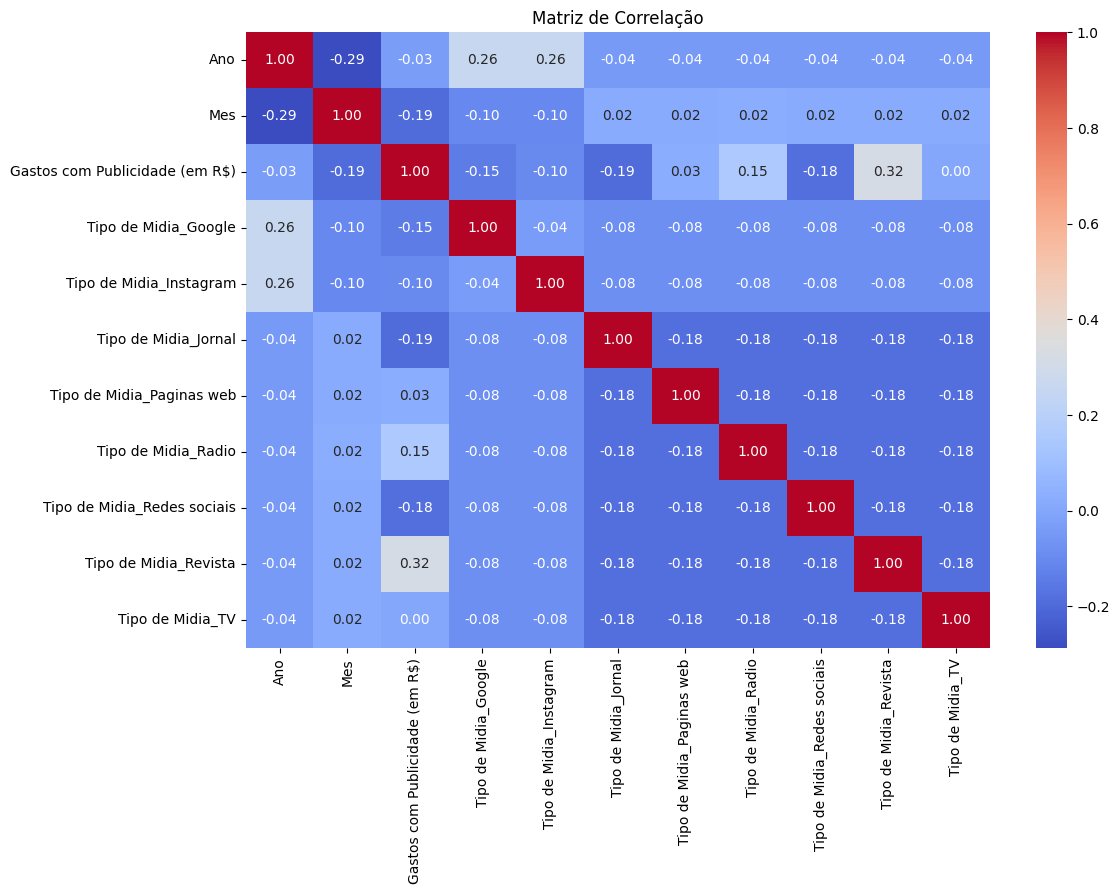

In [111]:
# gerando matriz de correlacao e grafico de mapa de calor
corr = df_dummies.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [112]:
# prever a coluna
X = df_dummies.drop(columns=['Gastos com Publicidade (em R$)'])
y = df_dummies['Gastos com Publicidade (em R$)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# treina modelo
model = LinearRegression()
model.fit(X_train, y_train)

# predições
y_pred = model.predict(X_test)

# métricas
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))


MSE: 24543.870937569824
R² : 0.1062882586425058


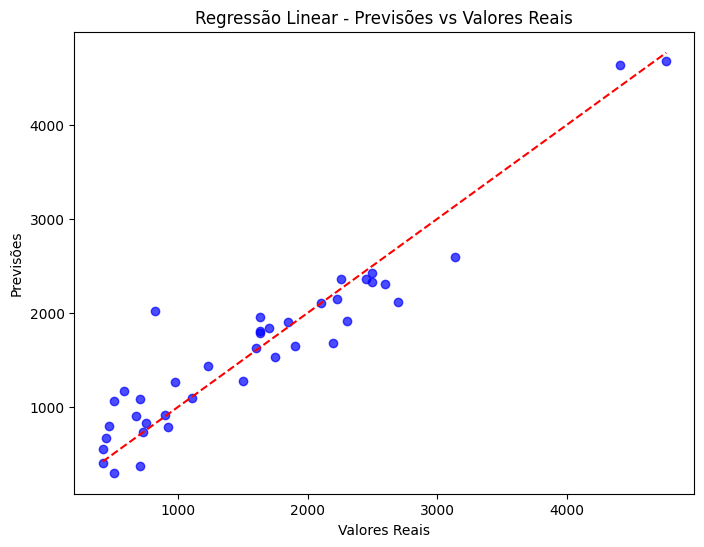

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão Linear - Previsões vs Valores Reais")
plt.show()